<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.458953,97.880796,-0.000401,148.339348,148.340114,-0.000767
1,0.0,1.0,96.074562,96.271880,0.000368,202.346810,202.346534,0.000276
2,0.0,2.0,76.130451,22.467852,-0.001638,108.596664,108.597518,-0.000853
3,0.0,3.0,95.751601,39.500691,0.001898,145.254190,145.251641,0.002549
4,0.0,4.0,25.090944,67.531730,-0.000635,102.622039,102.622712,-0.000673
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,32.291708,68.459308,0.000939,110.751954,110.750961,0.000993
59996,999.0,56.0,24.981261,33.735605,0.001155,68.718021,68.716342,0.001679
59997,999.0,57.0,29.038560,86.721182,-0.000328,125.759414,125.759881,-0.000467
59998,999.0,58.0,81.133155,27.015197,0.000932,118.149284,118.148168,0.001116


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    40.458953  97.880796 -0.000401  148.339348  148.340114 -0.000767
      1.0    96.074562  96.271880  0.000368  202.346810  202.346534  0.000276
      2.0    76.130451  22.467852 -0.001638  108.596664  108.597518 -0.000853
      3.0    95.751601  39.500691  0.001898  145.254190  145.251641  0.002549
      4.0    25.090944  67.531730 -0.000635  102.622039  102.622712 -0.000673
...                ...        ...       ...         ...         ...       ...
999.0 55.0   32.291708  68.459308  0.000939  110.751954  110.750961  0.000993
      56.0   24.981261  33.735605  0.001155   68.718021   68.716342  0.001679
      57.0   29.038560  86.721182 -0.000328  125.759414  125.759881 -0.000467
      58.0   81.133155  27.015197  0.000932  118.149284  118.148168  0.001116
      59.0   51.939803  95.456349  0.000027  157.396179  157.396567 -0.000388

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    40.458953  97.880796 -0.000401  148.339348  148.340114 -0.000767
      1.0    96.074562  96.271880  0.000368  202.346810  202.346534  0.000276
      2.0    76.130451  22.467852 -0.001638  108.596664  108.597518 -0.000853
      3.0    95.751601  39.500691  0.001898  145.254190  145.251641  0.002549
      4.0    25.090944  67.531730 -0.000635  102.622039  102.622712 -0.000673
...                ...        ...       ...         ...         ...       ...
999.0 55.0   32.291708  68.459308  0.000939  110.751954  110.750961  0.000993
      56.0   24.981261  33.735605  0.001155   68.718021   68.716342  0.001679
      57.0   29.038560  86.721182 -0.000328  125.759414  125.759881 -0.000467
      58.0   81.133155  27.015197  0.000932  118.149284  118.148168  0.001116
      59.0   51.939803  95.456349  0.000027  157.396179  157.396567 -0.000388

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.458953,97.880796,-0.000401,148.339348,148.340114,-0.000767
1,0.0,1.0,96.074562,96.271880,0.000368,202.346810,202.346534,0.000276
2,0.0,2.0,76.130451,22.467852,-0.001638,108.596664,108.597518,-0.000853
3,0.0,3.0,95.751601,39.500691,0.001898,145.254190,145.251641,0.002549
4,0.0,4.0,25.090944,67.531730,-0.000635,102.622039,102.622712,-0.000673
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,32.291708,68.459308,0.000939,110.751954,110.750961,0.000993
59996,999.0,56.0,24.981261,33.735605,0.001155,68.718021,68.716342,0.001679
59997,999.0,57.0,29.038560,86.721182,-0.000328,125.759414,125.759881,-0.000467
59998,999.0,58.0,81.133155,27.015197,0.000932,118.149284,118.148168,0.001116


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    40.458953  97.880796 -0.000401  148.339348  148.340114 -0.000767
      1.0    96.074562  96.271880  0.000368  202.346810  202.346534  0.000276
      2.0    76.130451  22.467852 -0.001638  108.596664  108.597518 -0.000853
      3.0    95.751601  39.500691  0.001898  145.254190  145.251641  0.002549
      4.0    25.090944  67.531730 -0.000635  102.622039  102.622712 -0.000673
...                ...        ...       ...         ...         ...       ...
999.0 55.0   32.291708  68.459308  0.000939  110.751954  110.750961  0.000993
      56.0   24.981261  33.735605  0.001155   68.718021   68.716342  0.001679
      57.0   29.038560  86.721182 -0.000328  125.759414  125.759881 -0.000467
      58.0   81.133155  27.015197  0.000932  118.149284  118.148168  0.001116
      59.0   51.939803  95.456349  0.000027  157.396179  157.396567 -0.000388

[60000 rows x 6 columns]

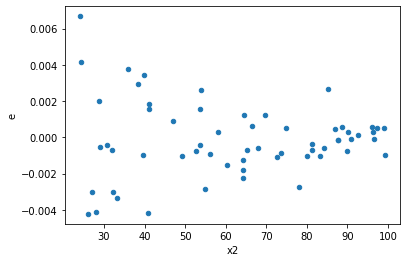

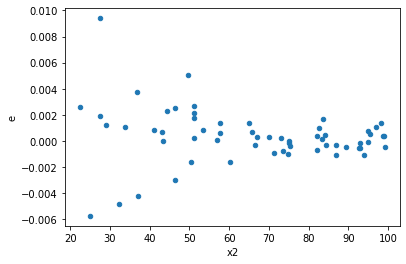

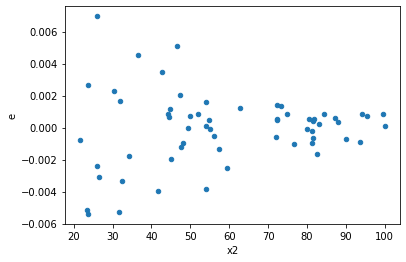

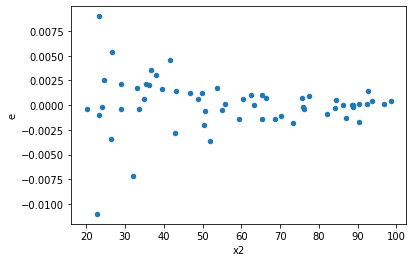

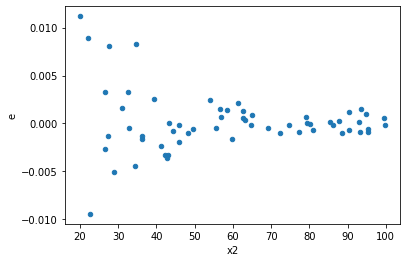

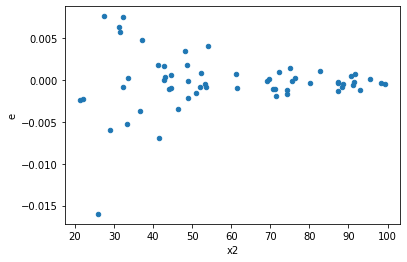

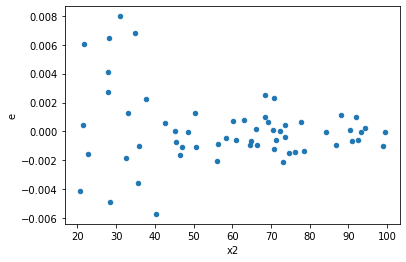

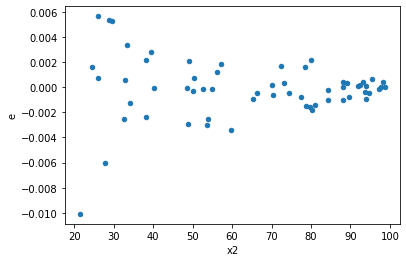

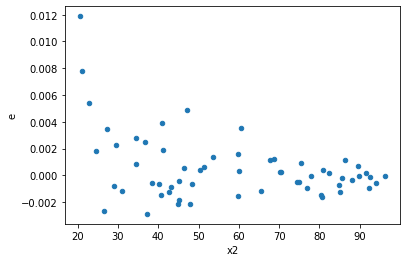

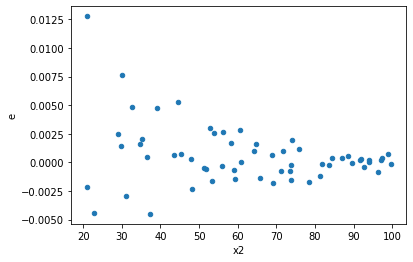

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,35.0,21.0,7.296938211210155e-05,0.0004502833848434727,2.084839488917187e-06,2.144206594492727e-05,10.284756240905498,5.559168783086932e-07,0.9999997220415608,2.779584391543466e-07,Reject005=0 : Heteroscedasticity
5.0,20.0,36.0,4.968230721659001e-05,0.0004047059410608625,2.4841153608295005e-06,1.1241831696135069e-05,4.5254869694864635,8.426159255048304e-05,0.9999578692037248,4.213079627524152e-05,Reject005=0 : Heteroscedasticity
6.0,29.0,27.0,2.7196978046426598e-05,0.000316632658133678,9.37826829187124e-07,1.1727135486432518e-05,12.504585197884769,3.7194576307797433e-09,0.9999999981402712,1.8597288153898717e-09,Reject005=0 : Heteroscedasticity
7.0,27.0,29.0,2.29168376877095e-05,0.0001549281263938502,8.48771766211463e-07,5.342349185994835e-06,6.294211705274656,4.579328860998544e-06,0.9999977103355695,2.289664430499272e-06,Reject005=0 : Heteroscedasticity
8.0,36.0,20.0,3.821200074228963e-05,0.00037112467551765876,1.061444465063601e-06,1.855623377588294e-05,17.482058069586397,8.005891283247024e-09,0.9999999959970544,4.002945641623512e-09,Reject005=0 : Heteroscedasticity
11.0,27.0,29.0,3.4689320054285076e-05,0.00021335235848727764,1.284789631640188e-06,7.356977878871642e-06,5.726212056583596,1.2434614803824573e-05,0.9999937826925981,6.2173074019122865e-06,Reject005=0 : Heteroscedasticity
13.0,38.0,18.0,9.244676674032159e-05,0.00029213013482772877,2.4328096510610946e-06,1.6229451934873822e-05,6.67107347580407,7.714754750898223e-05,0.9999614262262455,3.8573773754491114e-05,Reject005=0 : Heteroscedasticity
15.0,28.0,28.0,0.00010992676841033648,0.0005006754240592885,3.925956014654874e-06,1.7881265144974587e-05,4.5546269693871,0.0001400415776302566,0.9999299792111849,7.00207888151283e-05,Reject005=0 : Heteroscedasticity
18.0,42.0,14.0,0.00012005609770903591,0.0001668613599424494,2.8584785168818073e-06,1.1918668567317815e-05,4.169584797271586,0.005757541422551471,0.9971212292887243,0.0028787707112757355,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,27.0,0.0002433674253912505,4.558576861610461e-05,8.39198018590519e-06,1.6883618005964672e-06,0.20118753419272456,5.235088121518275e-05,Reject005=0 : Heteroscedasticity
1.0,25.0,31.0,0.00023707713950093016,3.5351851138300086e-05,9.483085580037206e-06,1.1403822947838738e-06,0.1202543502490884,7.502372269628828e-07,Reject005=0 : Heteroscedasticity
2.0,28.0,28.0,0.00038359566002635,9.586380124075908e-05,1.3699845000941073e-05,3.423707187169967e-06,0.2499084615143299,0.0004555754249182037,Reject005=0 : Heteroscedasticity
3.0,31.0,25.0,0.0004441727086437386,2.6567496756687927e-05,1.4328151891733502e-05,1.062699870267517e-06,0.07416866308352246,2.629597926652551e-10,Reject005=0 : Heteroscedasticity
4.0,35.0,21.0,7.296938211210155e-05,0.0004502833848434727,2.084839488917187e-06,2.144206594492727e-05,10.284756240905498,5.559168783086932e-07,Reject005=0 : Heteroscedasticity
5.0,20.0,36.0,4.968230721659001e-05,0.0004047059410608625,2.4841153608295005e-06,1.1241831696135069e-05,4.5254869694864635,8.426159255048304e-05,Reject005=0 : Heteroscedasticity
6.0,29.0,27.0,2.7196978046426598e-05,0.000316632658133678,9.37826829187124e-07,1.1727135486432518e-05,12.504585197884769,3.7194576307797433e-09,Reject005=0 : Heteroscedasticity
7.0,27.0,29.0,2.29168376877095e-05,0.0001549281263938502,8.48771766211463e-07,5.342349185994835e-06,6.294211705274656,4.579328860998544e-06,Reject005=0 : Heteroscedasticity
8.0,36.0,20.0,3.821200074228963e-05,0.00037112467551765876,1.061444465063601e-06,1.855623377588294e-05,17.482058069586397,8.005891283247024e-09,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    906
Reject005=1 : Homoscedasticity       94
Name: Result_test, dtype: int64